Documentation of Objectives [Click Here](https://docs.google.com/document/d/1F06Y821679OfJ45opgfPT56yiU4shnd0VTUfKgBKEpc/edit)

Documentation of session [Click Here]()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\aniruddh\\Desktop\\AI & ML -DSPS\\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Creating a new column family in the dataset by adding SibSp column and Parch column
df['Family']=df['SibSp']+df['Parch']
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [4]:
# Ticket--> As it is just a random number,we can skip this column from analysis
df.Family.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

In [5]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [6]:
df['Fare_Category']=pd.cut(df.Fare,bins=[0,7.9,14.45,31.00,512],labels=['Low','Mid','Mid-High','High'])
df['Fare_Category'].head()

0     Low
1    High
2     Mid
3    High
4     Mid
Name: Fare_Category, dtype: category
Categories (4, object): [Low < Mid < Mid-High < High]

In [7]:
df[['Fare','Fare_Category']]

,Fare,Fare_Category
0,7.2500,Low
1,71.2833,High
2,7.9250,Mid
3,53.1000,High
4,8.0500,Mid
...,...,...
886,13.0000,Mid
887,30.0000,Mid-High
888,23.4500,Mid-High
889,30.0000,Mid-High


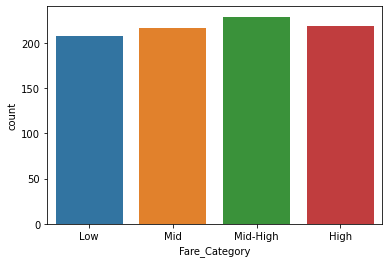

In [8]:
#Visualize the Fare Category
#Countplot give you entire count of a category-->categories of survived and deceased
sns.countplot(x='Fare_Category',data=df)

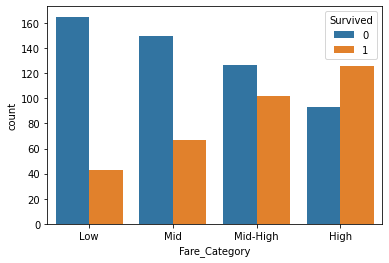

In [9]:
sns.countplot(x='Fare_Category',hue=df.Survived,data=df)

In [10]:
# Embarked:Port--> From which the passenger had boarded the ship
df.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

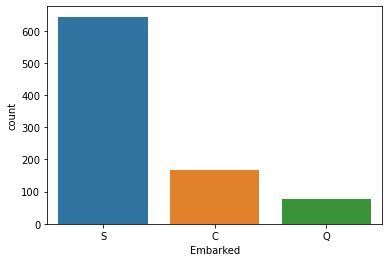

In [11]:
#Visualizing the Port column
sns.countplot(x='Embarked',data=df)

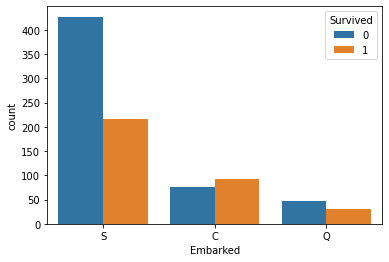

In [12]:
sns.countplot(x='Embarked',hue='Survived',data=df)

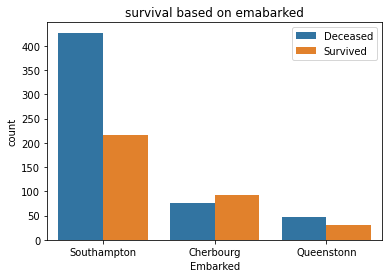

In [13]:
p=sns.countplot(x='Embarked',hue='Survived',data=df)
p.set_xticklabels(['Southampton','Cherbourg','Queenstonn'])
p.set_title('survival based on emabarked')
p.legend(labels=['Deceased','Survived'])

In [14]:
## Imputing with missing values
df.isnull().mean().sort_values(ascending=False)

Cabin            0.771044
Age              0.198653
Fare_Category    0.020202
Embarked         0.002245
Family           0.000000
Fare             0.000000
Ticket           0.000000
Parch            0.000000
SibSp            0.000000
Sex              0.000000
Name             0.000000
Pclass           0.000000
Survived         0.000000
PassengerId      0.000000
dtype: float64

In [15]:
# Cabin--> 77% missing values,we are going to create a new category as NA
df.Cabin.fillna('NA',inplace=True)

In [16]:
df.Cabin.isnull().sum()

0

In [17]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [18]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
# Median --> Sorting in the order (middle value) NaN in the age column
#should be substitued with the median of age

df.Age.fillna(df.Age.median(),inplace=True)
df.Age.isnull().sum()

0

In [20]:
#Imputing the Embarked Column-->Mode Imputation
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)
df.Embarked.isnull().sum()

0

In [21]:
df.Fare_Category.isnull().sum()

18

In [22]:
df.Fare_Category.fillna(df.Fare_Category.mode()[0],inplace=True)
df.Fare_Category.isnull().sum()

0

In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Family           0
Fare_Category    0
dtype: int64

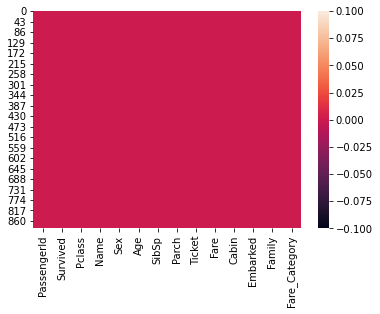

In [24]:
sns.heatmap(df.isnull())

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid


In [26]:
df['Age-Range']=pd.cut(df.Age,[0,10,20,30,40,60,80])
df[['Age','Age-Range']].head()

,Age,Age-Range
0,22.0,"(20, 30]"
1,38.0,"(30, 40]"
2,26.0,"(20, 30]"
3,35.0,"(30, 40]"
4,35.0,"(30, 40]"


In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category,Age-Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid,"(30, 40]"


In [28]:
dummy_set=pd.get_dummies(df.Fare_Category,drop_first=True) #n columns ,we need to include upto n-1 dummy columns

In [29]:
dummy_set

,Mid,Mid-High,High
0,0,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
886,1,0,0
887,0,1,0
888,0,1,0
889,0,1,0


In [30]:
df=pd.concat([df,dummy_set],axis=1)

In [31]:
# Encoding of Catrgorical Variables/columns
df=pd.concat([df,pd.get_dummies(df.Cabin,prefix='Cabin',drop_first=True),
             pd.get_dummies(df.Embarked,prefix='Embarked',drop_first=True),
             pd.get_dummies(df.Fare_Category,prefix='Fare',drop_first=True),
            pd.get_dummies(df['Age-Range'],drop_first=True)],axis=1)

In [32]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_Q,Embarked_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,1,1,0,0,0,1,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,1,0,1,0,1,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,...,0,1,0,1,0,0,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,0,1,0,0,1,0,0,0


In [33]:
# Encoding the Sex Column
from sklearn.preprocessing import LabelEncoder
df['Sex']=LabelEncoder().fit_transform(df.Sex)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_Q,Embarked_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,1,1,0,0,0,0,1,0,0


In [34]:
df.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Embarked','Fare_Category','Age-Range','Cabin'],
        axis=1,inplace=True)
df.shape


(891, 164)

In [35]:
df.head()

,Survived,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,...,Embarked_Q,Embarked_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0


In [36]:
df.dtypes

Survived    int64
Pclass      int64
Sex         int32
Family      int64
Mid         uint8
            ...  
(10, 20]    uint8
(20, 30]    uint8
(30, 40]    uint8
(40, 60]    uint8
(60, 80]    uint8
Length: 164, dtype: object

In [37]:
#Seperating input and output data,dropping the survived column from the data
X=df.drop('Survived',axis=1)
X.shape

(891, 163)

In [38]:
# output column
y=df.iloc[:,0]
y.shape

(891,)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)



In [40]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     Pclass  Sex  Family  Mid  Mid-High  High  Cabin_A14  Cabin_A16  \
35        1    1       1    0         0     1          0          0   
46        3    1       1    0         1     0          0          0   
453       1    1       1    0         0     1          0          0   
291       1    0       1    0         0     1          0          0   
748       1    1       1    0         0     1          0          0   
..      ...  ...     ...  ...       ...   ...        ...        ...   
715       3    1       0    0         0     0          0          0   
767       3    0       0    0         0     0          0          0   
72        2    1       0    0         0     1          0          0   
235       3    0       0    0         0     0          0          0   
37        3    1       0    1         0     0          0          0   

     Cabin_A19  Cabin_A20  ...  Embarked_Q  Embarked_S  Fare_Mid  \
35           0          0  ...           0           1         0   
46         

In [41]:
pd.set_option('display.max_columns',None)

In [43]:
pd.reset_option('display.max_columns')

In [44]:
df

,Survived,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,...,Embarked_Q,Embarked_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
887,1,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
888,0,3,0,3,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
889,1,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


For Classification: we are classifying whether the passenger is survived or not
-->Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression() #Creating object for LogisticRegression


In [47]:
# We have to apply this object(log_Reg) to the training data
log_reg.fit(X_train,y_train) # with help of fit method we are fitting the 
                          #LogisticRegression on training data

LogisticRegression()

In [50]:
## Predicting on the training data
# Syntax: objectName.predict(i/p)
y_train_pred=log_reg.predict(X_train)

y_train-->Orginial o/p <br
                          y_train_pred-->Model o/p

In [51]:
y_train==y_train_pred

35      True
46      True
453     True
291     True
748     True
       ...  
715     True
767    False
72      True
235     True
37      True
Name: Survived, Length: 668, dtype: bool

In [53]:
# accuracy_score-->with help of this metric,we can evaluate 
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.8488023952095808

In [54]:
## Perfromance Metrics---> To evaluate the model is predicting

In [55]:
#Predict the model on Test data:
y_test_pred=log_reg.predict(X_test)
y_test_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [56]:
y_test==y_test_pred

862     True
223     True
84      True
680    False
535     True
       ...  
506     True
467     True
740    False
354     True
449    False
Name: Survived, Length: 223, dtype: bool

In [57]:
# accuracy of the test data(Original test data o/p and the model predicted o/p)
accuracy_score(y_test,y_test_pred)

0.7713004484304933

In [72]:
#For training data --we got an accuracy of 84%
## For testing data-- we got an accuracy of 77%



